In [1]:
dataset_name = "W16_comb"
df_list = [
           "BES_Panel",
#            "BES_reduced_with_na",
#            "BESnumeric"
#            "BES_reduced",
#            "BESnumeric"
          ]

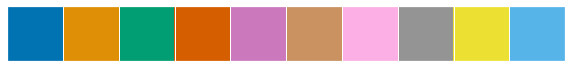

In [2]:
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re
sns.set()
sns.palplot(sns.color_palette("colorblind"))
from IPython.display import display, display_html, HTML
plt.rcParams["axes.grid"] = False

import Jupyter_module_loader
from utility import *
import gaussian_kde


In [3]:
# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
# %matplotlib inline
encoding = "ISO-8859-1"

(BES_code_folder, BES_small_data_files, BES_data_folder,
 BES_output_folder, BES_file_manifest, BES_R_data_files) = setup_directories()



In [4]:
global BES_Panel, BES_numeric, BES_reduced, BES_reduced_with_na, BES_non_numeric
data_subfolder = BES_data_folder + dataset_name + os.sep

(manifest, dataset_filename, dataset_description, dataset_citation,
 dataset_start, dataset_stop, dataset_wave) = get_manifest(dataset_name, BES_file_manifest)

for df in df_list:
    if df=="BES_Panel":
        globals()[df]  = pd.read_msgpack(data_subfolder + dataset_filename.replace('.dta','.msgpack'))
    else:
        globals()[df]  = pd.read_msgpack(data_subfolder + df + '.msgpack' )
        globals()[df].replace(-1,np.nan,inplace=True)
  
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\IPython\core\interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_values"+".csv")

In [6]:
global best_weight_series
def weighted_mean(series):
    return (series*best_weight_series.loc[series.index]).sum()/(best_weight_series.loc[series.index]).sum()


In [7]:
replace_dict = {'Labour Party':"LAB", 
 'United Kingdom Independence Party (UKIP)':"UKIP",
 'Labour':"LAB",
 'Conservative Party':"CON",
 'Conservative':"CON",
 'Liberal Democrats':"LD",
 'Did not vote':"DNV",
 'Scottish National Party':"SNP",
 'Scottish National Party (SNP)':"SNP",
 'British National Party (BNP)':"BNP",
 'Green Party':"GRN",
 'Liberal Democrat':"LD",
 "Don't know":"DK",
 'Some other party':"OTH",
 'Veritas':"VER",
 'Plaid Cymru':"PC",
 'Other':"OTH",
 'Respect':"RES",
 'I would not vote':"DNV",
 'No - none':"NON",
 "Brexit Party":"BXP",
 'Change UK- The Independent Group':"CUK",
 "Leave the EU":"LEAVE",
 "Stay/remain in the EU":"REMAIN",}

{'black',
 'blue',
 'brown',
 'chocolate',
 'cyan',
 'darkblue',
 'darkgreen',
 'darkorange',
 'darkred',
 'darkslategrey',
 'darkviolet',
 'dodgerblue',
 'fuchsia',
 'goldenrod',
 'green',
 'grey',
 'indianred',
 'indigo',
 'lightblue',
 'lightslategrey',
 'limegreen',
 'magenta',
 'mediumspringgreen',
 'navy',
 'olive',
 'orange',
 'pink',
 'purple',
 'red',
 'teal',
 'tomato',
 'yellow'}

In [9]:
linear_colour_list = ['blue','cyan','yellow','olive','green','limegreen','orange','brown','pink','purple','red']
howToReduceDeficit_cats = ['Only by increasing taxes','Mainly by increasing taxes, but also by cutting spending','An equal balance of spending cuts and tax increases', 
'Mainly by cutting spending, but with some tax increases','Only by cutting spending',"Don't know"   ]
party_colour_dict.update( {x:k for x,k in zip(howToReduceDeficit_cats,linear_colour_list[0:len(howToReduceDeficit_cats)+1]) if x != "Don't know"} )

leftRight_cats = ['Left', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Right',
       "Don't know"]
party_colour_dict.update( {x:k for x,k in zip(leftRight_cats,linear_colour_list[0:len(leftRight_cats)+1]) if x != "Don't know"} )

cutsTooFarNational_cats = ['Not gone nearly far enough', 'Not gone far enough', 'About right', 'Gone too far','Gone much too far', "Don't know"]
party_colour_dict.update( {x:k for x,k in zip(cutsTooFarNational_cats,linear_colour_list[0:len(cutsTooFarNational_cats)+1]) if x != "Don't know"} )

taxSpendSelf_cats = ['Government should cut taxes a lot and spend much less on health and social services','1', '2', '3', '4', '5', '6', '7', '8', '9',       
       'Government should increase taxes a lot and spend much more on health and social services', "Don't know"]
party_colour_dict.update( {x:k for x,k in zip(taxSpendSelf_cats,linear_colour_list[0:len(taxSpendSelf_cats)+1]) if x != "Don't know"} )


spend_cats = [ 'Spend much less','Spend less', 'Spend the same as now', 'Spend more','Spend much more',"Don't know"]
party_colour_dict.update( {x:k for x,k in zip(spend_cats,linear_colour_list[0:len(spend_cats)+1]) if x != "Don't know"} )

ageGroup_cats = ['Under 18', '18-25', '26-35', '36-45', '46-55', '56-65', '66+']
party_colour_dict.update( {x:k for x,k in zip(ageGroup_cats,linear_colour_list[0:len(ageGroup_cats)+1]) if x != "Don't know"} )

ageGroup_equalised_cats = BES_Panel["ageGroup_equalised"].astype(str).astype('category').cat.categories
party_colour_dict.update( {x:k for x,k in zip(ageGroup_equalised_cats,linear_colour_list[0:len(ageGroup_equalised_cats)+1]) if x != "Don't know"} )

KeyError: 'ageGroup_equalised'

In [71]:
party_colour_dict

{'Lab': 'red',
 'LAB': 'red',
 'Con': 'blue',
 'CON': 'blue',
 'UKIP': 'purple',
 'LD': 'orange',
 'Grn': 'green',
 'GRN': 'green',
 'BrexitParty': 'cyan',
 'BXP': 'cyan',
 'TIG': 'pink',
 'BNP': 'magenta',
 'SNP': 'yellow',
 'PC': 'olive',
 'Remain': 'yellow',
 'REMAIN': 'yellow',
 'Leave': 'blue',
 'LEAVE': 'blue',
 "Don't know": 'grey',
 'DK': 'grey',
 "Won't vote": 'black',
 'DNV': 'black',
 'NON': 'black',
 'Cameron': 'navy',
 'May': 'blue',
 'Osborne': 'darkblue',
 'Davidson': 'darkblue',
 'Boris': 'cyan',
 'Gove': 'darkviolet',
 'Rudd': 'teal',
 'Mogg': 'lightblue',
 'Hunt': 'grey',
 'Javid': 'dodgerblue',
 'Davis': 'lightblue',
 'Salmond': 'goldenrod',
 'Sturgeon': 'yellow',
 'Miliband': 'red',
 'Corbyn': 'red',
 'Blair': 'indianred',
 'AlanJohnson': 'pink',
 'Watson': 'chocolate',
 'McDonnell': 'darkred',
 'Jarvis': 'tomato',
 'Leonard': 'pink',
 'Wood': 'olive',
 'Price': 'olive',
 'Umunna': 'lightslategrey',
 'Berger': 'darkslategrey',
 'Soubry': 'mediumspringgreen',
 'Allen

In [61]:
colour_list

['grey',
 'orange',
 'red',
 'green',
 'purple',
 'indigo',
 'indigo',
 'indianred',
 'lightblue',
 'black',
 'fuchsia',
 'limegreen',
 'darkred',
 'darkviolet',
 'cyan']

In [55]:
search(BES_Panel,"^age($|W|Group)")

ageW1       30386
ageW7       30895
ageW8       33502
ageW9       30036
ageW11      30956
ageW12      34394
ageW13      31136
ageW14      31063
ageW16      37959
ageW15      30831
ageGroup    66552
Age         66552
dtype: int64

In [64]:
big_set_of_colours

['olive',
 'purple',
 'orange',
 'red',
 'green',
 'indigo',
 'indianred',
 'lightblue',
 'black',
 'cyan',
 'brown',
 'fuchsia',
 'limegreen',
 'darkred',
 'darkviolet',
 'navy',
 'blue',
 'chocolate',
 'darkblue',
 'pink',
 'darkgreen',
 'yellow',
 'dodgerblue',
 'magenta',
 'mediumspringgreen',
 'tomato',
 'teal',
 'goldenrod',
 'darkorange']

In [45]:
equalisedAgeGroup_at_W1 = pd.qcut(Age_at_W1,q=8, precision=0)
# equalisedAgeGroup_at_W1.value_counts().sort_index()
BES_Panel["ageGroup_full"] = pan_dataset_ages["standardAgeGroup_at_W1"]
BES_Panel["ageGroup_equalised"] = equalisedAgeGroup_at_W1

BES_Panel["ageGroup_equalised"] = BES_Panel["ageGroup_equalised"].astype(str).astype('category')#.cat.categories
nicer_age_group_labels = [x.replace("(","").replace("]","").replace(".0","").replace(" ","").replace(",","-") for x in BES_Panel["ageGroup_equalised"].cat.categories]
BES_Panel["ageGroup_equalised"].cat.rename_categories(nicer_age_group_labels, inplace=True)

NameError: name 'Age_at_W1' is not defined

In [83]:
BES_Panel["housing"] = BES_Panel["housing"].replace(9999,"Don't know").cat.remove_unused_categories()

cats = BES_Panel["profile_gross_household"].cat.categories
BES_Panel["profile_gross_household"].cat.rename_categories( [x.replace("Â","") for x in cats],inplace=True)
party_colour_dict.update( {x:k for x,k in zip(cats,linear_colour_list[0:len(cats)+1]) if x != "Don't know"} )

In [198]:
pan_dataset_ages = pd.read_csv( BES_small_data_files + "pan_dataset_ages"+".csv" )
pan_dataset_ages["equalisedAgeGroup_at_W1"].value_counts()

(30.0, 38.0]    11688
(38.0, 46.0]    11603
(60.0, 66.0]    11583
(12.0, 22.0]    11583
(53.0, 60.0]    11573
(22.0, 30.0]    11564
(66.0, 95.0]    11563
(46.0, 53.0]    11427
Name: equalisedAgeGroup_at_W1, dtype: int64

In [199]:
BES_Panel["ageGroup_full"] = pan_dataset_ages["standardAgeGroup_at_W1"]

BES_Panel["ageGroup_equalised"] = pan_dataset_ages["equalisedAgeGroup_at_W1"].astype(str).astype('category')#.cat.categories
nicer_age_group_labels = [x.replace("(","").replace("]","").replace(".0","").replace(" ","").replace(",","-") for x in BES_Panel["ageGroup_equalised"].cat.categories]
BES_Panel["ageGroup_equalised"].cat.rename_categories(nicer_age_group_labels, inplace=True)

In [185]:
pan_dataset_ages["standardAgeGroup_at_W1"]

0             66+
1             66+
2        Under 18
3           56-65
4        Under 18
           ...   
92582       46-55
92583       36-45
92584         66+
92585       36-45
92586       36-45
Name: standardAgeGroup_at_W1, Length: 92587, dtype: object

In [191]:
search(BES_Panel,"edlevel").index

Index(['edlevelW1_W6', 'edlevelW7', 'edlevelW8W9W10', 'edlevelW11',
       'edlevelW12', 'edlevelW13', 'edlevelW14', 'edlevelW15', 'edlevelW16'],
      dtype='object')

In [195]:
BES_Panel["edlevelW16"].value_counts()

Undergraduate        13196
A-level               7595
GCSE                  7156
Postgrad              3208
No qualifications     2292
Below GCSE            1457
Name: edlevelW16, dtype: int64

In [207]:
BES_Panel["ageGroup_equalised"].cat.remove_categories("nan")

0        53-60
1        60-66
2        66-95
3        46-53
4        66-95
         ...  
92582    30-38
92583    22-30
92584    53-60
92585    30-38
92586    22-30
Name: ageGroup_equalised, Length: 92587, dtype: category
Categories (8, object): [12-22, 22-30, 30-38, 38-46, 46-53, 53-60, 60-66, 66-95]

In [352]:
BES_Panel["ethnicity"] = BES_Panel["profile_ethnicity"]=="White British"
BES_Panel["ethnicity"] = BES_Panel["ethnicity"].replace(True,"White British").replace(False,"Not White British")
BES_Panel.loc[BES_Panel["profile_ethnicity"].isnull(),"ethnicity"] = np.nan
BES_Panel["ethnicity"] = BES_Panel["ethnicity"].astype('category')

In [11]:
BES_Panel["profile_gross_household"].value_counts()

Prefer not to answer               10720
Â£10,000 to Â£14,999 per year       4559
Â£20,000 to Â£24,999 per year       4543
Â£15,000 to Â£19,999 per year       4482
Don't know                          4301
Â£25,000 to Â£29,999 per year       4232
Â£30,000 to Â£34,999 per year       3745
Â£35,000 to Â£39,999 per year       3103
Â£5,000 to Â£9,999 per year         3027
Â£50,000 to Â£59,999 per year       2794
Â£40,000 to Â£44,999 per year       2678
Â£70,000 to Â£99,999 per year       2405
Â£45,000 to Â£49,999 per year       2186
Â£60,000 to Â£69,999 per year       1905
under Â£5,000 per year              1556
Â£100,000 to Â£149,999 per year      912
Â£150,000 and over                   403
Name: profile_gross_household, dtype: int64

In [10]:
BES_Panel["profile_gross_personal"].value_counts()

Prefer not to answer             10499
Â£10,000 to Â£14,999 per year     6550
Â£15,000 to Â£19,999 per year     6096
Â£5,000 to Â£9,999 per year       6011
Â£20,000 to Â£24,999 per year     5380
under Â£5,000 per year            5336
Â£25,000 to Â£29,999 per year     4216
Â£30,000 to Â£34,999 per year     3192
Don't know                        2510
Â£35,000 to Â£39,999 per year     2132
Â£40,000 to Â£44,999 per year     1578
Â£50,000 to Â£59,999 per year     1131
Â£45,000 to Â£49,999 per year     1020
Â£70,000 to Â£99,999 per year      735
Â£60,000 to Â£69,999 per year      572
Â£100,000 and over                 446
Name: profile_gross_personal, dtype: int64

In [ ]:
BES_Panel["profile_gross_personal_eq"] = BES_Panel["profile_gross_personal"]

["Don't know",
 'Prefer not to answer',
 'under £5,000 per year',
 '£10,000 to £14,999 per year',
 '£100,000 and over',
 '£15,000 to £19,999 per year',
 '£20,000 to £24,999 per year',
 '£25,000 to £29,999 per year',
 '£30,000 to £34,999 per year',
 '£35,000 to £39,999 per year',
 '£40,000 to £44,999 per year',
 '£45,000 to £49,999 per year',
 '£5,000 to £9,999 per year',
 '£50,000 to £59,999 per year',
 '£60,000 to £69,999 per year',
 '£70,000 to £99,999 per year']

In [202]:
party_colour_dict = {"Lab":"red","LAB":"red",
                     "Con":'blue',"CON":'blue',"UKIP":"purple","LD":"orange",
                     "Grn":'green',"GRN":'green',
                     "BrexitParty":"cyan","BXP":'cyan',
                     "TIG":"pink","BNP":"magenta",
                     "SNP":'yellow',"PC":'olive',
                     "Remain":"yellow","REMAIN":'yellow',"Leave":"blue","LEAVE":'blue',
                     "Don't know":"grey","DK":'grey',
                     "Won't vote":"black","DNV":'black',"NON":'black',
                     "Cameron":'navy',"May":'blue',
                     "Osborne":"darkblue","Davidson":"darkblue",
                     "Boris":'cyan',"Gove":"darkviolet","Rudd":'teal',"Mogg":"black" ,"Hunt":"grey" , "Javid":"dodgerblue", 
                     "Davis":"lightblue","Mogg":'lightblue',
                     "Salmond":'goldenrod',"Sturgeon":'yellow',
                     "Miliband":'red',"Corbyn":'red',"Blair":"indianred",
                     "AlanJohnson":'pink',"Watson":"chocolate","McDonnell":"darkred","Jarvis":'tomato',"Leonard":'pink',
                     "Wood":'olive',"Price":'olive',
                     "Umunna":"lightslategrey","Berger":'darkslategrey',"Soubry":'mediumspringgreen',"Allen":"darkslategrey",
                     "Clegg":'orange',"Farron":'orange',"Cable":'orange',"Rennie":'darkorange',
                     "Farage":'purple',"SEvans":"fuchsia","Nuttall":'indigo',"Batten":'indigo',
                     "Bennett":'green',"Lucas":'limegreen',"Harvie":"green","Berry":'darkgreen',"Bartley":'limegreen',
                     "Allow many fewer":"blue",
                     "1":'cyan',"Bad for economy":'cyan',"Undermines cultural life":'cyan','Strongly disagree':'cyan','It is completely necessary':'cyan',
                     "2":'yellow','Disagree':'yellow','It is important but not absolutely  necessary':'yellow',
                     "3":'olive','Neither agree nor disagree':'olive','It is not necessary but it would be desirable':'olive',
                     "4":'green', 'Agree':'green','It is completely unnecessary':'green',
                     "5":"limegreen",'Strongly agree':'limegreen',
                     "6":"orange",
                     "7":'brown',"Good for economy":'brown',"Enriches cultural life":'brown',
                     "8":'pink',
                     "9":'purple',
                     "Allow many more":'red',
#                      "The Sun": 'cyan',
#                      "The Guardian": 'green',
#                      "The Mirror / Daily Record":'red',
#                      "The Daily Mail / The Scottish Daily Mail":'blue',
#                      "The Times":'yellow',
                    }

big_set_of_colours = list(set(party_colour_dict.values()))
big_set_of_colours = [x for x in big_set_of_colours if x not in ['grey','lightslategrey','darkslategrey']]
big_set_of_colours = ['olive', 'purple', 'orange', 'red', 'cyan',
                      'limegreen', 'darkred', 'blue', 'chocolate',
                      'pink', 'darkgreen', 'yellow', 'darkorange','magenta', 'mediumspringgreen', 'tomato', 'teal',
                      'goldenrod',  'indianred']

In [185]:
BES_Panel["parentsForeignW8"].value_counts()

No            21152
Yes            3143
Don't know      241
Name: parentsForeignW8, dtype: int64

In [14]:
from scipy import interpolate

In [208]:
# %%time
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import colors
import matplotlib.patches as mpatches

sns.set(font_scale=2.5)

wave_descriptions = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"][["Wave No","Friendlier_Description"]].set_index("Wave No")

granularity = 21
x_axis = pan_dataset_allr_values.columns[0].replace("200",str(granularity-1)).replace("{uniform}","")
y_axis = pan_dataset_allr_values.columns[1].replace("200",str(granularity-1)).replace("{uniform}","")
pan_dataset_allr_values[x_axis] = pd.qcut( pan_dataset_allr_values[pan_dataset_allr_values.columns[2]], q=granularity, labels=range(0,granularity))
pan_dataset_allr_values[y_axis] = pd.qcut( pan_dataset_allr_values[pan_dataset_allr_values.columns[3]], q=granularity, labels=range(0,granularity))
# pan_dataset_allr_values[x_axis] = pd.qcut( pan_dataset_allr_values["original_lr_scale"], q=granularity, labels=range(0,granularity))
# pan_dataset_allr_values[y_axis] = pd.qcut( pan_dataset_allr_values["original_al_scale"], q=granularity, labels=range(0,granularity))

output_granularity=800
min_sample_size =100    
smoothing = 50.0
pop_gridlines = False
max_z_size = 1.0
num_legend_columns = 3
normalize_heights = True
use_bes_weights = False
bes_wave_based = False
break_single_variable = True
abbreviate_variables = False
normalise_to_category_size = True
auto_update_colour_list = True
use_dist_cols = False
drop_cats = ["nan"]
# ['Any other Asian background', 'Prefer not to say', 'Other ethnic group','White British','Black African']
# ["Other local daily morning newspaper","The Western Mail","The Independent","Other Newspaper","None"]#["Don't know","5"]

# stub_var = "partyId"
stub_var = "ageGroup_equalised"
title_base = "Age Group (equal sized age groups)"
scale_text = 'Overrepresentation factor'
#"Probability of choosing option"
#
cbar_text = "Dominant Option (in territory size order)"

#['Bad for economy', '2', '3', '4', '5', '6', 'Good for economy',
#        "Don't know"]
# search(BES_Panel,"partyMemberNow")
# [1,2,3,4,5, 7, 9, 13] 
if use_bes_weights:
    aggfunc = weighted_mean
else:
    aggfunc = np.mean

# region = "England"
region = None
if region is not None:
    specific_mask = (BES_Panel["country"]==region)# & (BES_Panel["profile_eurefvote"]=="Leave the EU")
else:
    specific_mask = BES_Panel["id"].notnull()
# ["W2","W6","W8","W12","W14","W16"]
max_wave = 17
skip_waves = [5]
skip_waves = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,13,15 ]
skip_waves = [1,2,3,4,5, 7, 9, 13]
skip_waves = [5,6,9,12]
# [1, 2, 3, 4, 7, 8, 10, 11][4, 6, 10, 11, 15] [1, 2, 3, 4, 6, 7, 12, 14]
skip_waves = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,16 ]
# skip_waves = []
wave_list = ["W"+str(x) for x in list(range(1,max_wave)) if x not in skip_waves]
# wave_list = [str(x) for x in [2005,2010,2015,2017]]
wave_list=  [""]
for wave in wave_list:
    if bes_wave_based:
        wave_no = int(wave.replace("W",""))
        title_extra = "\n"+wave_descriptions.loc[wave_no].values[0]#+"; "+region#+"&Leave-2016"
    else:
        title_extra = "\n"+wave#+"; "+region#+"&Leave-2016"

# treatment = "brexitself_surface"
#     treatment = "ptv_surface"+wave+"_" + region# + "_LEAVE2016"
    treatment = stub_var+"_surface"+wave#+"originalPC"#+"_"
    
    if region is not None:
            treatment = treatment+"_"+region
            title_extra = title_extra+"; "+region
    output_subfolder = create_subdir(BES_output_folder, treatment)

# party_list = ["Lab","Con","LD","Grn","UKIP","TIG","BrexitParty"]
# party_list = ["ptv"+x for x in party_list]
# party_list = ["brexitSelf"]
    if break_single_variable:
        
        if drop_cats:
            df1 = pd.get_dummies(BES_Panel[stub_var+wave].cat.remove_categories(drop_cats))
            df1.loc[BES_Panel[stub_var+wave].apply(lambda x: x in drop_cats or pd.isnull(x)).replace(np.nan,False),:]=np.nan
        else:
            df1 = pd.get_dummies(BES_Panel[stub_var+wave])
        mask = BES_Panel[stub_var+wave].notnull() & df1[df1.columns[0]].notnull() & specific_mask
#     eurevote_col_replace_dict = {"Don't know":"Don't know", "I would/will not vote":"Won't vote", "Leave the EU":"Leave",
#                   "Stay/remain in the EU":"Remain"}
        if abbreviate_variables:
            df1.columns = [replace_dict[x] for x in df1.columns]
        party_list = df1.columns
    else:
    ## sample size!
#         temp = match(BES_Panel,"like(.*)"+wave+"$", mask = specific_mask)
#         party_list = list(temp[temp>min_sample_size].index)
#         party_list = [x for x in party_list if re.match("like(.*)W\d+",x).groups()[0] in ["Con","Lab","SNP","PC","UKIP","Grn","BNP","LD","BrexitParty","TIG"]]
        
        temp = match(BES_Panel,"like(.*)"+wave+"$", mask = specific_mask)
        party_list = list(temp[temp>min_sample_size].index)
        party_list = [x for x in party_list if re.match("like(.*)W\d+",x).groups()[0] not in ["CandA","CandB","SNPExtra","Con","Lab","SNP","PC","UKIP","Grn","BNP","LD","BrexitParty","TIG","DUP"]]        
        
        print(party_list)
#     temp = match(BES_Panel,"ptv.*"+wave+"$", mask = specific_mask)
#     party_list = list(temp[temp>min_sample_size].index)
    
    

    
    # specific_mask = 1

    interp_dict = {}

    largestN = 0


    for party in party_list:
        print(party)
    #     like_var = "ptv"+party
        like_var = party

        like_name = "probability to vote "+party
#         scale_text = ' 0-Very Unlikely, 10-Very Likely'
        title_text = title_base+like_var+title_extra
#         title_text = "Which party do you feel closest to: "+like_var+"?"+title_extra
        

    #     like_name = "Some people want to leave the European Union immediately without a deal.\nOther people would like to cancel Brexit and remain in the EU.\nWhere would you place yourself and the political parties on this scale?"
    #     scale_text = ' 0-Leave the EU without a deal, 10-Remain in the EU'    
    #     title_text = like_name

        # fix disordered categories!
        if "ptv" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['Very unlikely','1', '2', '3', '4', '5', '6', '7', '8', '9',
                       'Very likely', "Don't know" ]))    
        elif "like" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['Strongly dislike','1', '2', '3', '4', '5', '6', '7', '8', '9', "Don't know",
        'Strongly like']))                
        elif "immigEcon" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['Bad for economy', '2', '3', '4', '5', '6', 'Good for economy',
       "Don't know"]))  
        elif "immigCultural" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['Undermines cultural life', '2', '3', '4', '5', '6',
       'Enriches cultural life', "Don't know"]))     
        elif "immigrantsWelfareState" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['Strongly disagree', 'Disagree', 'Neither agree nor disagree',
       'Agree','Strongly agree',  "Don't know"]))  
        elif "deficitReduce" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(['It is completely necessary','It is important but not absolutely  necessary','It is not necessary but it would be desirable','It is completely unnecessary',"Don't know"]))  
        elif "howToReduceDeficit" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(howToReduceDeficit_cats))  
        elif "leftRight" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(leftRight_cats))
        elif "taxSpendSelf" in like_var:
            BES_Panel[[x for x in BES_Panel.columns if like_var in x]] = \
                BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
                    .apply(lambda x: x.cat.reorder_categories(taxSpendSelf_cats))            
   


        # mean across all waves
    #     mean_like_Corbyn = BES_Panel[[x for x in BES_Panel.columns if like_var in x]]\
    #     .replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)

#         mean_like_Corbyn = BES_Panel[[like_var]]\
#         .replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)
        if break_single_variable:
            mean_like_Corbyn = df1[like_var]
        else:
            mean_like_Corbyn = BES_Panel[[like_var]]\
            .replace("Don't know",np.nan).apply(lambda x:x.cat.codes).replace(-1,np.nan).mean(axis=1)          
            mask = mean_like_Corbyn.notnull() & specific_mask

#         
        N_equal_text = " (N="+str(mask.sum())+")"
        
        global best_weight_series
        best_weight_variable = search(BES_Panel,"wt_",mask=mask).sort_values(ascending=False).index[0]
        best_weight_series = BES_Panel[best_weight_variable]

        likeCorbyn_heatmap = pd.crosstab(index = pan_dataset_allr_values[y_axis][mask],
                    columns = pan_dataset_allr_values[x_axis][mask],
                    values = mean_like_Corbyn[mask],
                    aggfunc = aggfunc)

        plt.figure(figsize = (16,10))
        ax = sns.heatmap(data = likeCorbyn_heatmap.replace(np.nan,-1),
                    cbar_kws={'label': like_var+ scale_text})
        ax.invert_yaxis()

        plt.xlim([0,granularity])
        plt.ylim([0,granularity])
        plt.xlabel(x_axis);
        plt.ylabel(y_axis);
        plt.title(title_text+N_equal_text)
        plt.savefig(BES_output_folder + treatment + os.sep + clean_filename(like_var) +"_by_PC_heatmap" + ".png",
                   bbox_inches='tight')
        plt.close()

        #### INTERPOLATE

        size = likeCorbyn_heatmap.columns.max()
        x,y = np.mgrid[ 0:size:granularity*1j, 0:size:granularity*1j ]
        z =  likeCorbyn_heatmap.values.flatten()
        non_null_mask = ~np.isnan(z)
        x = x.flatten()[non_null_mask]
        y = y.flatten()[non_null_mask]
        z = z[non_null_mask]
        print("There are " + str(np.sum(~non_null_mask)) + " nulls") 
        interp_dict[party]=interpolate.Rbf(x,y,z,function='linear',smooth=smoothing)


        grid=np.mgrid[0:size:1j*output_granularity,
                       0:size:1j*output_granularity]
        result=interp_dict[party](grid[0,:,:],grid[1,:,:]);
        plt.figure(figsize=(14,14));
        img = plt.imshow(result,interpolation = 'none',origin ='lower',
                  extent = (0,granularity-1,0,granularity-1)); #Apparently nice smooth linear-ish interpolation
        plt.grid(None)
        plt.locator_params(nbins=5)
        cbar = plt.colorbar(img,shrink=0.5, aspect=5, label =  like_var+ scale_text );#, title = "\n".join(scale_text.split(",")) );
        plt.xlabel(x_axis);
        plt.ylabel(y_axis);
        plt.title(title_text+N_equal_text)
        plt.savefig(BES_output_folder + treatment + os.sep + clean_filename(like_var) +"_by_PC_interpolated" + ".png",
                   bbox_inches='tight')
        plt.close()



        ### 3D Surface

        X,Y = grid
        Z = result.reshape(X.shape)
        # this seems to flip the axes!
        # Plot the surface.
        fig = plt.figure(figsize=(14,14));

        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)

        ax.set_title(title_text+N_equal_text, fontsize=18)
        # Customize the z axis.
        ax.set_zlim(0, max_z_size);
#         ax.zaxis.set_major_locator(LinearLocator(10));
        plt.xlabel(y_axis, fontsize=14);
        plt.ylabel(x_axis, fontsize=14);
        ax.set_zlabel(like_var+ scale_text, fontsize=14);
        plt.locator_params(nbins=5)
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.tick_params(axis='both', which='minor', labelsize=14)


        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5);

    #     fig.show();
        fig.savefig(BES_output_folder + treatment + os.sep + clean_filename(like_var) +"_by_PC_3D" + ".png",
                   bbox_inches='tight')
        plt.close()
        
        if mask.sum()>largestN:
            largestN = mask.sum()
        

    ###################

    
    overall_N_equal_text = " (N="+str(largestN)+")"

#     output_granularity=500
    grid=np.mgrid[0:size:1j*output_granularity,
                   0:size:1j*output_granularity]

    df = pd.DataFrame()
    for party in party_list:
        df[party]=interp_dict[party](grid[0,:,:],grid[1,:,:]).flatten()

    #df["max"] = df.max(axis=1)
    # df["leading_party"] = df.apply(lambda x: x.index[x[df.columns]==x["max"]][0],axis=1) # slow ~ 30s
    if normalise_to_category_size:
        temp = BES_Panel[stub_var+wave].cat.remove_categories(drop_cats).value_counts()
        temp = pd.Series(temp/temp.sum()).loc[df.columns]
        df = df.divide(temp,axis=1)
    

    df["leading_party"] = df.idxmax(axis=1)
    df["max"] = df.max(axis=1)/max_z_size
    surf_min = df["max"].min()
    surf_max = df["max"].max()
    if normalize_heights:       
        df["max"] = ( df["max"]-surf_min ) / (surf_max-surf_min )

    ######################

    dominant_parties = list(df["leading_party"].value_counts().index)
    display(df["leading_party"].value_counts())

# "Remain":"yellow","Leave":"blue",

    
#     ageGroup_cats = ['Under 18', '18-25', '26-35', '36-45', '46-55', '56-65', '66+']
    if auto_update_colour_list:
        party_colour_dict.update( {x:k for x,k in zip(dominant_parties,big_set_of_colours[0:len(dominant_parties)+1]) if x not in party_colour_dict.keys()} )



    legend_patch_list = []

    count = 0
    colour_list = []
    repl_dict = {}
    for party in dominant_parties:
        repl_dict[party] = count

        party_name = party#.replace("ptv","").split("W")[0]
        if abbreviate_variables:
            party_name = re.match(stub_var+"(.*)W\d+",party).groups()[0]
#         party.replace("like","").split("W")[0]
        colour = party_colour_dict[ party_name ]
        colour_list.append( colour )
        legend_patch_list.append( mpatches.Patch(color=colour, label=party_name) )
        count=count+1

    #######################


#     cmap = colors.ListedColormap(colour_list)
#     bounds=list(range(0,np.max(list(repl_dict.values()))+2))

#     norm = colors.BoundaryNorm(bounds, cmap.N)
#     colour_list = ["yellow","blue"]
    

    from matplotlib import colors as mcolors
    color_dict = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)


#     colour_list = ['yellow','blue']
    eta = .001
    cdict = {'red':[],'green':[],'blue':[],'alpha':[]}

    n = len(colour_list)
    anchor_pts = np.linspace(0.0,1.0,n+1)
    
    if use_dist_cols:
        dist_col_list = distinct_colors(n)    
    

    for col_no in range(0,n):
        x = anchor_pts[col_no]
        col = mcolors.to_rgba( color_dict[ colour_list[col_no] ] )
        if use_dist_cols:
            col = dist_col_list[col_no]
        cdict['red'].append(   (x,col[0],col[0]) )
        cdict['green'].append( (x,col[1],col[1]) )
        cdict['blue'].append(  (x,col[2],col[2]) )
        cdict['alpha'].append(  (x,0.0,0.0 ) )

        x = anchor_pts[col_no+1]-eta
        if col_no ==(n-1):
            x = x+eta
        col = mcolors.to_rgba( color_dict[ colour_list[col_no] ] )
        if use_dist_cols:
            col = dist_col_list[col_no]        
        cdict['red'].append(   (x,col[0],col[0]) )
        cdict['green'].append( (x,col[1],col[1]) )
        cdict['blue'].append(  (x,col[2],col[2]) )
        cdict['alpha'].append(  (x,1.0,1.0 ) )

    plt.register_cmap(name='test', data=cdict)

    df["leading_party"] = df["leading_party"].replace(repl_dict).astype('float')
#     df["leading_party"] = 1.0-df["leading_party"]

    res = df["leading_party"].values.reshape((output_granularity,output_granularity))
    res = (df["leading_party"]+df["max"]).values.reshape((output_granularity,output_granularity))

    ######################
#     plt.rcParams["axes.grid"] = False
#     title_text = "Which parties have the highest Probability To Ever Vote\nat any given Political Compass position?"+title_extra
#     title_text = "How would/did/would you vote (again) in an EU referendum?"+title_extra
#     title_text = "How would you vote in the next General Election?"+title_extra
    patchwork_title_text = title_base+title_extra
    

    # make a color map of fixed colors
    plt.figure(figsize=(15,14));
    # tell imshow about color map so that only set colors are used
    print(np.min(res),np.max(res),len(colour_list))
    img = plt.imshow(res/len(colour_list), origin='lower',
                  cmap='test',interpolation='none',norm=None,vmin=0.0, vmax=1.0,
                  extent = (0,granularity-1,0,granularity-1) )
#                         cmap=cmap, norm=norm,
    from matplotlib import cm
    import matplotlib.ticker as ticker
    def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
        new_cmap = colors.LinearSegmentedColormap.from_list(
            'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
            cmap(np.linspace(minval, maxval, n)))
        return new_cmap

    cmap = plt.get_cmap('test')
    new_cmap = truncate_colormap(cmap, 0.0, 1.0/n, 1000)    
    
    plt.colorbar(cm.ScalarMappable(norm=cm.colors.Normalize(vmax=surf_min*max_z_size, vmin=surf_max*max_z_size),
                                   cmap=new_cmap),shrink=0.5, label = scale_text, format=ticker.FormatStrFormatter('%.2g'))
    
    plt.xlabel(x_axis);
    plt.ylabel(y_axis);
#     plt.rcParams["axes.grid"] = False
    plt.title(patchwork_title_text+overall_N_equal_text)
    plt.locator_params(nbins=5)
    plt.grid(None)

    if pop_gridlines==True:

        hmax = sns.kdeplot(pan_dataset_allr_values[x_axis][specific_mask],pan_dataset_allr_values[y_axis][specific_mask],
                           cut=0, alpha=.2)
        hmax.collections[0].set_alpha(0)


    plt.legend(handles=legend_patch_list, bbox_to_anchor=(0.5, -0.095),loc="upper center",
               fancybox=True, shadow=True, title=cbar_text, ncol=num_legend_columns, fontsize=14)
    plt.annotate(dataset_citation, (0,0), (0, -170-10*np.ceil(n/num_legend_columns)),
                     xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 7) ;     


    plt.savefig(BES_output_folder + treatment + os.sep + "all_ptv_surfaces"+"_by_PC_territory" + ".png",
                bbox_inches='tight')
    plt.close()

    ######################################

    X,Y = grid
    Z = df["max"].values.reshape(X.shape)
    # this seems to flip the axes!
    # Plot the surface.
    fig = plt.figure(figsize=(14,14));

    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    ax.set_title(title_text+overall_N_equal_text, fontsize=18)

    # Customize the z axis.
    ax.set_zlim(0, max_z_size);
#     ax.zaxis.set_major_locator(LinearLocator(10));
    plt.xlabel(y_axis, fontsize=14);
    plt.ylabel(x_axis, fontsize=14);
    plt.locator_params(nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=14)
    ax.set_zlabel(patchwork_title_text+overall_N_equal_text, fontsize=14);
    
    fig.savefig(BES_output_folder + treatment + os.sep + "all_ptv_surfaces" +"_by_PC_3D" + ".png",
               bbox_inches='tight')
    plt.close()
    ################

    plt.figure(figsize=(14,14));
    img = plt.imshow(Z,interpolation = 'none',origin ='lower',
              extent = (0,granularity-1,0,granularity-1)); #Apparently nice smooth linear-ish interpolation
    plt.grid(None)
    plt.locator_params(nbins=5)
    cbar = plt.colorbar(img,shrink=0.5, aspect=5, label = scale_text);
    plt.xlabel(x_axis);
    plt.ylabel(y_axis);
    plt.title(patchwork_title_text+overall_N_equal_text)
    plt.savefig(BES_output_folder + treatment + os.sep + "all_ptv_surfaces" +"_by_PC_interpolated" + ".png",
                bbox_inches='tight')
    plt.close()
gc.collect()

# plt.xticks(fontsize=14, rotation=90)

12-22
There are 0 nulls
22-30
There are 0 nulls
30-38
There are 0 nulls
38-46
There are 0 nulls
46-53
There are 0 nulls
53-60
There are 0 nulls
60-66
There are 0 nulls
66-95
There are 0 nulls


12-22    245362
66-95    180606
53-60     71644
30-38     58453
38-46     45659
46-53     18340
22-30     17002
60-66      2934
Name: leading_party, dtype: int64

0.0005253489035184881 7.424388220020157 8


5

In [157]:
[x for x in BES_Panel["profile_ethnicity"].cat.categories if x not in dominant_parties]

['Any other Asian background', 'Prefer not to say']

4.0

In [124]:
import random
 
def distinct_colors(n):
  ret = []
  r = 128+int(random.random() * 128)
  g = 128+int(random.random() * 128)
  b = 128+int(random.random() * 128)
  step = 128 / n
  for i in range(n):
    r += step
    g += step
    b += step
    r = 128+ (int(r) % 128)
    g = 128+ (int(g) % 128)
    b = 128+ (int(b) % 128)
    ret.append((r/255,g/255,b/255)) 
  return ret

In [145]:
display(df["leading_party"].value_counts())

0.0     109408
1.0      99741
2.0      91975
3.0      74315
4.0      49878
5.0      44786
6.0      43159
7.0      39074
8.0      33202
9.0      32045
10.0     15769
11.0      3782
12.0      2866
Name: leading_party, dtype: int64

In [173]:
dict(zip(dominant_parties,colour_list))

{'Black Caribbean': 'purple',
 'Chinese': 'cyan',
 'Pakistani': 'olive',
 'White and Asian': 'orange',
 'Any other black background': 'red',
 'Bangladeshi': 'limegreen',
 'Indian': 'chocolate',
 'Any other mixed background': 'pink',
 'White and Black African': 'blue',
 'Any other white background': 'darkgreen',
 'Black African': 'yellow'}

In [137]:
dominant_parties

['Pakistani',
 'Black Caribbean',
 'White and Asian',
 'Any other black background',
 'Chinese',
 'Bangladeshi',
 'White British',
 'Indian',
 'White and Black African',
 'Any other mixed background',
 'Any other white background',
 'Black African',
 'White and Black Caribbean',
 'Other ethnic group']

In [147]:
colour_list

['olive',
 'purple',
 'orange',
 'red',
 'green',
 'darkblue',
 'lightblue',
 'cyan',
 'limegreen',
 'darkred',
 'darkviolet',
 'blue',
 'chocolate']

In [28]:
skip_waves = [5,8,9,10,11,13,15,16 ]
wave_list = ["W"+str(x) for x in list(range(1,max_wave)) if x not in skip_waves]

In [25]:
search(BES_Panel,"immigEcon")

immigEconW1     30335
immigEconW2     30240
immigEconW3     28114
immigEconW4     31444
immigEconW7     30895
immigEconW8     33502
immigEconW10    30237
immigEconW11    30956
immigEconW13    31136
immigEconW14    31063
immigEconW15    30842
immigEconW16    37959
dtype: int64

In [32]:
### build animated gif


filename_list = []
sorted_wavelist = []
# skip_waves = [ 1, 3, 4, 5, 7, 9, 10,11,13,15 ]
for wave in wave_list:
    
    wave_no = int(wave.replace("W",""))
    sorted_wavelist.append(wave_no)
#     treatment = "ptv_surface"+wave+"_" + region + "_LEAVE2016"
    treatment = stub_var+"_surface"+wave#+"originalPC"#+"_"
    treatment = stub_var+"_surface"+wave
    if region is not None:
            treatment = treatment+"_"+region
#     treatment = "eurefvote_surface"+wave+"originalPC"
#     C:\Users\Marios\Documents\GitHub\BES_analysis\BES_analysis_output\leftRight_minusDKs_surfaceW16
    filename_list.append( BES_output_folder + treatment + os.sep + "all_ptv_surfaces"+"_by_PC_territory" + ".png" )



import imageio


images = []
for filename in filename_list:
    images.append(imageio.imread(filename))
images.append(imageio.imread(filename)) # last slide delay doesn't seem to be being respected on twitter - so add the last one twice
sorted_wavelist.append(wave_no)
imageio.mimsave(BES_output_folder + treatment + os.sep +'animated_ptv_surfaces.gif', images,'GIF',
                duration=[6.0 if x==np.min( sorted_wavelist ) or x==np.max( sorted_wavelist ) else 3.0 for x in sorted_wavelist])  

In [29]:
filename_list

['../BES_analysis_output/immigEcon_surfaceW1\\all_ptv_surfaces_by_PC_territory.png',
 '../BES_analysis_output/immigEcon_surfaceW2\\all_ptv_surfaces_by_PC_territory.png',
 '../BES_analysis_output/immigEcon_surfaceW3\\all_ptv_surfaces_by_PC_territory.png',
 '../BES_analysis_output/immigEcon_surfaceW4\\all_ptv_surfaces_by_PC_territory.png',
 '../BES_analysis_output/immigEcon_surfaceW7\\all_ptv_surfaces_by_PC_territory.png',
 '../BES_analysis_output/immigEcon_surfaceW8\\all_ptv_surfaces_by_PC_territory.png',
 '../BES_analysis_output/immigEcon_surfaceW10\\all_ptv_surfaces_by_PC_territory.png',
 '../BES_analysis_output/immigEcon_surfaceW11\\all_ptv_surfaces_by_PC_territory.png']

In [56]:
######
search(BES_Panel,"^age($|W|Group)")

ageW1       30386
ageW7       30895
ageW8       33502
ageW9       30036
ageW11      30956
ageW12      34394
ageW13      31136
ageW14      31063
ageW16      37959
ageW15      30831
ageGroup    66552
Age         66552
dtype: int64

In [59]:
BES_Panel[ search(BES_Panel,"^ageW\d+|^age$|^Age$").index ].copy().astype('float32')

,ageW1,ageW7,ageW8,ageW9,ageW11,ageW12,ageW13,ageW14,ageW16,ageW15,Age
0,58.0,60.0,60.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,58.0
1,62.0,64.0,64.0,64.0,65.0,65.0,65.0,66.0,NaN,NaN,62.0
2,76.0,78.0,NaN,NaN,79.0,79.0,79.0,80.0,81.0,81.0,76.0
3,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0
4,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0
...,...,...,...,...,...,...,...,...,...,...,...
92582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
92583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,NaN
92584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
92585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN


In [102]:
# just ageWX variables

ageW_vars = BES_Panel[ search(BES_Panel,"^ageW\d+|^age$|^Age$").index ].copy().astype('float32')
ageW_vars[ageW_vars<15] = np.nan
ageW_vars[ageW_vars>105] = np.nan
ageW_vars.loc[33553,"ageW8"] = np.nan
ageW_vars.loc[739,"ageW1"] = np.nan
ageW_vars.loc[739,"Age"] = np.nan
ageW_vars.loc[2944,"ageW1"] = np.nan
ageW_vars.loc[2944,"Age"] = np.nan
ageW_vars.loc[6819,"ageW14"] = np.nan
ageW_vars.notnull().sum(axis=1).value_counts().sort_index()

0         3
1     24574
2     17238
3      8195
4      6494
5      5915
6      5461
7      6372
8      5002
9      5341
10     4853
11     3139
dtype: int64

In [95]:
age_var_num = ageW_vars.notnull().sum(axis=1)
obvious_disparities = (ageW_vars.max(axis=1)-ageW_vars.min(axis=1))>=9
obvious_disparities.sum()

age_var_num[obvious_disparities].value_counts().sort_index()
# not much to be done about those 7!

2     5
3    10
4     6
5     8
6     1
7     2
9     1
dtype: int64

In [99]:
easy_filterable = ((obvious_disparities) &  (age_var_num>5))
len( easy_filterable[easy_filterable].index )

4

In [104]:
dict_of_bad_variables = {}
for ind in easy_filterable[easy_filterable].index:
#     first = easy_filterable[easy_filterable].index[0]
    mean_age = ageW_vars.loc[ind].mean()
    age_abs_dev = np.abs(ageW_vars.loc[ind] - mean_age)

    bad_variable = age_abs_dev.dropna().sort_values(ascending=False).index[0]
    bad_deviation = age_abs_dev.dropna().sort_values(ascending=False).values[0]
    dict_of_bad_variables[ind] = (bad_variable,bad_deviation)
    
    ageW_vars.loc[ind,bad_variable] = np.nan
dict_of_bad_variables    

{2681: ('ageW15', 10.36364),
 6819: ('Age', 11.5),
 7848: ('Age', 10.0),
 47339: ('ageW15', 5.4444427)}

In [113]:
from scipy.optimize import curve_fit

def match_age(x, ageW7c, ageW8c, ageW9c,ageW11c,ageW12c,ageW13c,ageW14c,ageW15c,ageW16c):
    x = pd.DataFrame(x, columns = ['ageW1', 'ageW7', 'ageW8', 'ageW9', 'ageW11', 'ageW12', 'ageW13',
       'ageW14', 'ageW15', 'ageW16', 'Age']).replace(0, np.nan)
    x["ageW7"]  -= ageW7c
    x["ageW8"]  -= ageW8c
    x["ageW9"]  -= ageW9c    
    x["ageW11"] -= ageW11c
    x["ageW12"] -= ageW12c
    x["ageW13"] -= ageW13c
    x["ageW14"] -= ageW14c
    x["ageW15"] -= ageW15c
    x["ageW16"] -= ageW16c     
    return x.std(axis=1)
    
    

In [115]:
comparisons_possible = ageW_vars.notnull().sum(axis=1)>=2
ydata = np.zeros(sum(comparisons_possible))



popt, pcov = curve_fit(match_age, ageW_vars[comparisons_possible].replace(np.nan,0).values, ydata, p0=[2,2,2, 3,3,3, 4,2,0])

In [116]:
popt

array([1.81368497, 1.89961546, 1.96295385, 2.33039763, 2.55873121,
       2.64188457, 3.58166956, 4.64035894, 4.45193276])

In [117]:
ageW_vars_matched = ageW_vars.copy()
ageW_vars_matched["ageW7"]  -= popt[0]
ageW_vars_matched["ageW8"]  -= popt[1]
ageW_vars_matched["ageW9"]  -= popt[2]    
ageW_vars_matched["ageW11"] -= popt[3]
ageW_vars_matched["ageW12"] -= popt[4]
ageW_vars_matched["ageW13"] -= popt[5]
ageW_vars_matched["ageW14"] -= popt[6]
ageW_vars_matched["ageW15"] -= popt[7]
ageW_vars_matched["ageW16"] -= popt[8]

# ageW_vars_matched["age"] -= 2    
# ageW_vars_matched["Age"] -= 0

In [118]:
# max_minus_min = ageW_vars_matched.max(axis=1) - ageW_vars_matched.min(axis=1)
# max_minus_min[max_minus_min>4].value_counts().sum()

age_var_num = ageW_vars_matched.notnull().sum(axis=1)
obvious_disparities = (ageW_vars_matched.max(axis=1)-ageW_vars_matched.min(axis=1))>=4
obvious_disparities.sum()

age_var_num[obvious_disparities].value_counts().sort_index()
# not much to be done about those 7!


2     15
3     16
4     16
5     10
6     14
7     16
8     21
9     23
10    23
11    14
dtype: int64

In [119]:
easy_filterable = ((obvious_disparities) &  (age_var_num>=3))
len( easy_filterable[easy_filterable].index )

153

In [121]:
dict_of_bad_variables = {}
for ind in easy_filterable[easy_filterable].index:
#     first = easy_filterable[easy_filterable].index[0]
    mean_age = ageW_vars_matched.loc[ind].mean()
    age_abs_dev = np.abs(ageW_vars_matched.loc[ind] - mean_age)

    bad_variable = age_abs_dev.dropna().sort_values(ascending=False).index[0]
    bad_deviation = age_abs_dev.dropna().sort_values(ascending=False).values[0]
    dict_of_bad_variables[ind] = (bad_variable,bad_deviation)
    
    ageW_vars.loc[ind,bad_variable] = np.nan
    ageW_vars_matched.loc[ind,bad_variable] = np.nan
dict_of_bad_variables    

{1434: ('ageW1', 7.113247473877806),
 1492: ('ageW1', 8.603255131703023),
 1623: ('ageW1', 11.853055807656219),
 1743: ('ageW1', 25.492144020591915),
 2191: ('ageW1', 5.743895383265055),
 2681: ('ageW14', 9.950434574723836),
 2709: ('ageW1', 4.541818902449229),
 2891: ('ageW1', 7.927435955169038),
 3576: ('ageW1', 13.458181097550764),
 3687: ('ageW1', 15.669063568320354),
 4142: ('ageW11', 0.4329984764509618),
 4816: ('ageW1', 3.8881228942974815),
 4946: ('ageW11', 0.3733692166983076),
 5105: ('ageW1', 3.3676996018458),
 5167: ('ageW1', 5.111877105702511),
 5381: ('Age', 0.857070381467274),
 5559: ('ageW15', 8.924294685048878),
 5634: ('ageW1', 15.62253659467332),
 6611: ('ageW1', 3.2975002521006616),
 6682: ('ageW12', 10.960845858746119),
 6819: ('ageW15', 8.365298003994909),
 7081: ('ageW1', 4.032886576395313),
 7236: ('ageW1', 4.019046672308171),
 7370: ('Age', 1.7759084603569235),
 7394: ('ageW1', 25.8867525261222),
 7823: ('ageW11', 0.38808484994719805),
 7848: ('ageW16', 8.216044

In [122]:
cleaned_ages = ageW_vars_matched.mean(axis=1)
cleaned_ages.to_msgpack(BES_small_data_files+"cleaned_ages")

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: to_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  


In [123]:
pred_ages = pd.read_msgpack(BES_small_data_files+"pred_ages" )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000004FC0B208>]],
      dtype=object)

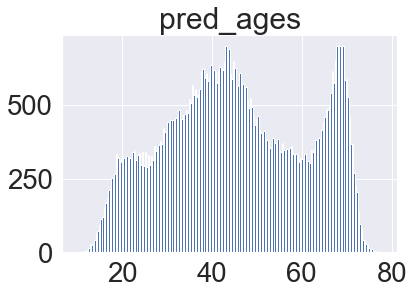

In [124]:
pred_ages.hist(bins=200)

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


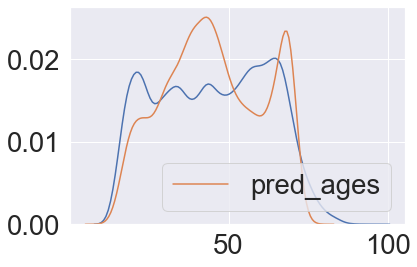

In [125]:
sns.kdeplot(cleaned_ages);
sns.kdeplot(pred_ages["pred_ages"]);

## doesn't look amazing ... but pseudo-R^2 ~80%

In [127]:
# BES_Panel.loc[67676,top_age_correlates_bespanel].dropna()

ageW_vars.loc[63078,"ageW13"] = np.nan
ageW_vars_matched.loc[63078,"ageW13"] = np.nan

ageW_vars.loc[63211,"age"] = np.nan
ageW_vars_matched.loc[63211,"age"] = np.nan

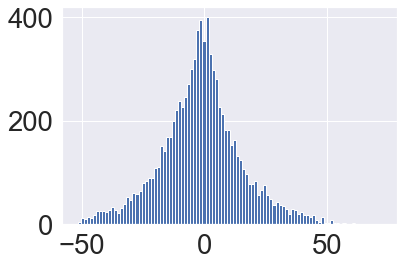

In [128]:
# disparities between single age variable and pred_ages
# not great, but at least reasonably normal looking
(ageW_vars.loc[(age_var_num==1)].sum(axis=1)-pred_ages.loc[(age_var_num==1)]["pred_ages"]).hist(bins=100)

In [129]:
# respondents that post cleaning have *no* age variables?
# substitute in pred_ages (better than obvious gibberish/nothing!)
ageW_vars.loc[(age_var_num==0)]
pred_ages.loc[(age_var_num==0)]
ageW_vars_matched.loc[12229,"Age"] = 41.688381
ageW_vars_matched.loc[62207,"Age"] = 27.849688

In [278]:
Age_at_W1 = ageW_vars_matched.mean(axis=1)
Age_at_W1_rounded = Age_at_W1.round()
# fill in the last 3 gaps with averages
Age_at_W1_rounded.loc[62208] = 71
Age_at_W1_rounded.loc[75417] = 45
Age_at_W1_rounded.loc[78141] = 45
Age_at_W1.loc[62208] = 71
Age_at_W1.loc[75417] = 45
Age_at_W1.loc[78141] = 45

In [223]:
BES_Panel["ageGroup"].cat.categories


Index(['18-25', '26-35', '36-45', '46-55', '56-65', '66+', 'Under 18'], dtype='object')

In [225]:
# pd.cut(Age_at_W1, bins = [ 18, 25,35,45,55,65])
age_group_cats =  ['Under 18', '18-25', '26-35', '36-45', '46-55', '56-65', '66+']
standard_age_groups = pd.IntervalIndex.from_arrays([0, 18, 26,36,46,56,66], [17, 25, 35, 45, 55, 65, 120], closed = 'both')
standardAgeGroup_at_W1 = pd.cut(Age_at_W1_rounded, standard_age_groups, labels = age_group_cats)
standardAgeGroup_at_W1.cat.rename_categories(age_group_cats, inplace=True)
standardAgeGroup_at_W1.value_counts().sort_index()

Under 18     3571
18-25       13186
26-35       14684
36-45       14823
46-55       14913
56-65       18126
66+         13284
dtype: int64

In [226]:
# equal_length_age_groups = pd.IntervalIndex.from_arrays([13, 18, 26,36,46,56,66], [17, 25, 35, 45, 55, 65, 120], closed = 'both')
equalLengthAgeGroup_at_W1 = pd.cut(Age_at_W1_rounded, range(10,96,5) )
# standardAgeGroup_at_W1.cat.rename_categories(BES_Panel["ageGroup"].cat.categories, inplace=True)
equalLengthAgeGroup_at_W1.value_counts().sort_index()

(10, 15]    1171
(15, 20]    7424
(20, 25]    8162
(25, 30]    6853
(30, 35]    7831
(35, 40]    6901
(40, 45]    7922
(45, 50]    7156
(50, 55]    7757
(55, 60]    8912
(60, 65]    9214
(65, 70]    8079
(70, 75]    3447
(75, 80]    1298
(80, 85]     421
(85, 90]      33
(90, 95]       6
dtype: int64

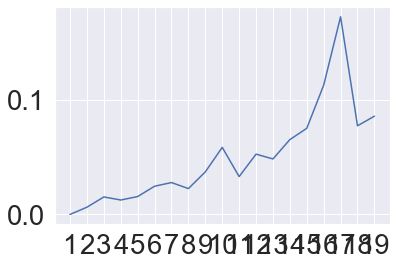

In [227]:
frac_diff_between_emptiest_fullest_bin = []
q_values = range(1,20)
for q in q_values:
    x = pd.qcut(Age_at_W1,q=q, precision=0).value_counts().sort_index()
    (x/x.mean()).max(),(x/x.mean()).min()
    frac_diff_between_emptiest_fullest_bin.append( (x/x.mean()).max() - (x/x.mean()).min() )

plt.plot(q_values,frac_diff_between_emptiest_fullest_bin);
plt.xticks(q_values);
# frac_diff_between_emptiest_fullest_bin

# 8 split is best balance between number of categories and flatness of categories


In [228]:
equalisedAgeGroup_at_W1 = pd.qcut(Age_at_W1,q=8, precision=0)
equalisedAgeGroup_at_W1.value_counts().sort_index()


(12.0, 22.0]    11583
(22.0, 30.0]    11564
(30.0, 38.0]    11688
(38.0, 46.0]    11603
(46.0, 53.0]    11427
(53.0, 60.0]    11573
(60.0, 66.0]    11583
(66.0, 95.0]    11563
dtype: int64

In [229]:
# Age_at_W1 = ageW_vars_matched.mean(axis=1)
# Age_at_W1_rounded = Age_at_W1.round()
Age_at_W7 = Age_at_W1 + popt[0]
Age_at_W8 = Age_at_W1 + popt[1]
Age_at_W9 = Age_at_W1 + popt[2]
Age_at_W11 = Age_at_W1 + popt[3]
Age_at_W12 = Age_at_W1 + popt[4]
Age_at_W13 = Age_at_W1 + popt[5]
Age_at_W14 = Age_at_W1 + popt[6]

standardAgeGroup_at_W1
equalisedAgeGroup_at_W1

pan_dataset_ages = pd.concat([BES_Panel["id"].astype('int'),
                              Age_at_W1,
                              Age_at_W1_rounded,
                              Age_at_W7,
                              Age_at_W8,
                              Age_at_W9,
                              Age_at_W11,
                              Age_at_W12,
                              Age_at_W13,
                              Age_at_W14,
                              standardAgeGroup_at_W1,
                              equalisedAgeGroup_at_W1,
                              equalLengthAgeGroup_at_W1]
                              ,axis=1)

pan_dataset_ages.columns = ["id",
                            "Age_at_W1","Age_at_W1_rounded","Age_at_W7","Age_at_W8","Age_at_W9",
                            "Age_at_W11","Age_at_W12","Age_at_W13","Age_at_W14",
                            "standardAgeGroup_at_W1","equalisedAgeGroup_at_W1","equalLengthAgeGroup_at_W1"]
pan_dataset_ages["Age_at_W1_rounded"] = pan_dataset_ages["Age_at_W1_rounded"].astype('int8')

# pan_dataset_ages["id"] = BES_Panel["id"].astype('int')

pan_dataset_ages.to_csv(    BES_small_data_files + "pan_dataset_ages"+".csv", index=False)
pan_dataset_ages.to_msgpack(BES_small_data_files + "pan_dataset_ages"+".msgpack")

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: to_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.


In [177]:
pan_dataset_ages["equalLengthAgeGroup_at_W1"].value_counts()

(60, 65]    9214
(55, 60]    8912
(20, 25]    8162
(65, 70]    8079
(40, 45]    7922
(30, 35]    7831
(50, 55]    7757
(15, 20]    7424
(45, 50]    7156
(35, 40]    6901
(25, 30]    6853
(70, 75]    3447
(75, 80]    1298
(10, 15]    1171
(80, 85]     421
(85, 90]      33
(90, 95]       6
Name: equalLengthAgeGroup_at_W1, dtype: int64

In [179]:
pan_dataset_ages["equalisedAgeGroup_at_W1"].value_counts()

(30.0, 38.0]    11688
(38.0, 46.0]    11603
(60.0, 66.0]    11583
(12.0, 22.0]    11583
(53.0, 60.0]    11573
(22.0, 30.0]    11564
(66.0, 95.0]    11563
(46.0, 53.0]    11427
Name: equalisedAgeGroup_at_W1, dtype: int64

66+         18126
56-65       14913
46-55       14823
36-45       14684
Under 18    13284
26-35       13186
18-25        3571
Name: standardAgeGroup_at_W1, dtype: int64

In [230]:
pan_dataset_ages

,id,Age_at_W1,Age_at_W1_rounded,Age_at_W7,Age_at_W8,Age_at_W9,Age_at_W11,Age_at_W12,Age_at_W13,Age_at_W14,standardAgeGroup_at_W1,equalisedAgeGroup_at_W1,equalLengthAgeGroup_at_W1
0,1,58.064749,58,59.878434,59.964365,60.027703,60.395147,60.623480,60.706634,61.646419,56-65,"(53.0, 60.0]","(55, 60]"
1,2,62.245674,62,64.059359,64.145289,64.208627,64.576071,64.804405,64.887558,65.827343,56-65,"(60.0, 66.0]","(60, 65]"
2,3,76.331260,76,78.144945,78.230875,78.294214,78.661658,78.889991,78.973145,79.912930,66+,"(66.0, 95.0]","(75, 80]"
3,4,51.000000,51,52.813685,52.899615,52.962954,53.330398,53.558731,53.641885,54.581670,46-55,"(46.0, 53.0]","(50, 55]"
4,5,68.000000,68,69.813685,69.899615,69.962954,70.330398,70.558731,70.641885,71.581670,66+,"(66.0, 95.0]","(65, 70]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92582,94883,37.548067,38,39.361752,39.447683,39.511021,39.878465,40.106798,40.189952,41.129737,36-45,"(30.0, 38.0]","(35, 40]"
92583,94884,29.548067,30,31.361752,31.447683,31.511021,31.878465,32.106798,32.189952,33.129737,26-35,"(22.0, 30.0]","(25, 30]"
92584,94885,58.548067,59,60.361752,60.447683,60.511021,60.878465,61.106798,61.189952,62.129737,56-65,"(53.0, 60.0]","(55, 60]"
92585,94886,33.548067,34,35.361752,35.447683,35.511021,35.878465,36.106798,36.189952,37.129737,26-35,"(30.0, 38.0]","(30, 35]"
